In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynlo
import numpy as np

In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
from scipy.constants import pi, c, epsilon_0
km = 1e3
nm = 1e-9
um = 1e-6
mm = 1e-3
ps = 1e-12
fs = 1e-15
GHz = 1e9
THz = 1e12
pJ = 1e-12
mW = 1e-3

In [4]:
def dB(num):
    return 10 * np.log10(np.abs(num)**2)

## Simulation settings

In [5]:
Window  = 60   # simulation window (ps)
Steps   = 100     # simulation steps
Points  = 2**14  # simulation points

## Pulse settings

In [6]:
frep = 10*GHz
Pavg = 5
EPP = Pavg/frep
print('Energy = %0.1f pJ' %(EPP/pJ))

Energy = 500.0 pJ


In [7]:
FWHM    = 0.670  # pulse duration (ps)
pulseWL = 1559.9   # pulse central wavelength (nm)
# EPP     = 500*pJ # Energy per pulse (J)
frep    = 10e3 # Repetition rate MHz
GDD     = 0.0    # Group delay dispersion (ps^2)
TOD     = 0.0    # Third order dispersion (ps^3)

# create the pulse
pulse = pynlo.light.DerivedPulses.SechPulse(power = 1, # Power will be scaled by set_epp
                                            T0_ps                   = FWHM/1.76,
                                            center_wavelength_nm    = pulseWL,
                                            time_window_ps          = Window,
                                            GDD=GDD, TOD=TOD,
                                            NPTS            = Points,
                                            frep_MHz        = frep,
                                            power_is_avg    = False)

# set the pulse energy
pulse.set_epp(EPP)

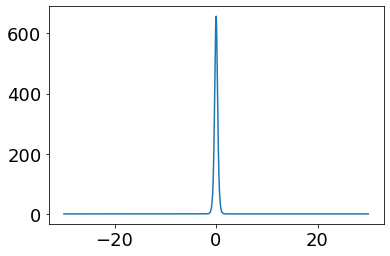

In [8]:
plt.plot(pulse.T_ps, abs(pulse.AT)**2)

## Fiber 1 settings (5m segment of normal dispersion HNLF)

In [9]:
def get_betas(D, Dslope, wl):
    b2 = -D*wl**2/(2*pi*c)
    b3 = (wl**2/(2*pi*c))**2 * (Dslope - 2*D/wl)
    return b2,b3

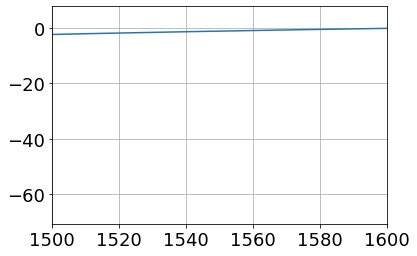

In [10]:
Length  = 5   # length in m

D = -1.0 #ps/nm/km
Dslope = 0.019
beta2, beta3 = get_betas(D*ps/nm/km, Dslope*ps/nm/nm/km, 1.55*um)

beta2 = beta2/(ps**2/km) # (ps^2/km)
beta3 = beta3/(ps**3/km) # (ps^3/km)
beta4 = 0
# beta2   = -7.265     # (ps^2/km)
# beta3   = 0.06381    # (ps^3/km)
# beta4   = -5.45e-5    # (ps^4/km)
# beta5   = 1e-8

Alpha   = 0.9e-5     # attentuation coefficient (dB/cm)
Gamma   = 11.5    # Gamma (1/(W km))

fibWL   = pulseWL # Center WL of fiber (nm)

Raman   = True    # Enable Raman effect?
Steep   = True    # Enable self steepening?

alpha = np.log((10**(Alpha * 0.1))) * 100  # convert from dB/cm to 1/m

# create the fiber
fiber1 = pynlo.media.fibers.fiber.FiberInstance()
fiber1.generate_fiber(Length, center_wl_nm=fibWL, betas=(beta2, beta3, beta4),
                              gamma_W_m=Gamma * 1e-3, gvd_units='ps^n/km', gain=-alpha)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(pulse.wl_nm, fiber1.Beta2_to_D(pulse))
ax.set_xlim([1500,1600])
# ax.set_ylim([-2,2])
ax.grid(True)

## Fiber 2 settings (0.6m of SMF)

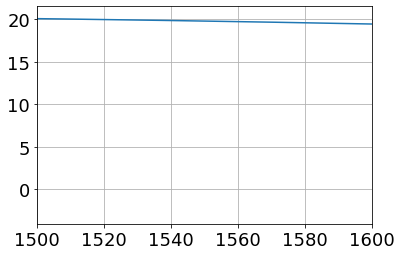

In [11]:
Length  = 0.6   # length in m

D = 20
Dslope = 0.045
beta2, beta3 = get_betas(D*ps/nm/km, Dslope*ps/nm/nm/km, 1.55*um)

beta2 = beta2/(ps**2/km) # (ps^2/km)
beta3 = beta3/(ps**3/km) # (ps^3/km)
beta4 = 0


Alpha   = 0.9e-5     # attentuation coefficient (dB/cm)
Gamma   = 10.5    # Gamma (1/(W km))

fibWL   = pulseWL # Center WL of fiber (nm)

Raman   = True    # Enable Raman effect?
Steep   = True    # Enable self steepening?

alpha = np.log((10**(Alpha * 0.1))) * 100  # convert from dB/cm to 1/m

# create the fiber
fiber2 = pynlo.media.fibers.fiber.FiberInstance()
fiber2.generate_fiber(Length, center_wl_nm=fibWL, betas=(beta2, beta3, beta4),
                              gamma_W_m=Gamma * 1e-3, gvd_units='ps^n/km', gain=-alpha)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(pulse.wl_nm, fiber2.Beta2_to_D(pulse))
ax.set_xlim([1500,1600])
# ax.set_ylim([-10,10])
ax.grid(True)

## Fiber 3 settings (2m of anomalous dispersion HNLF)

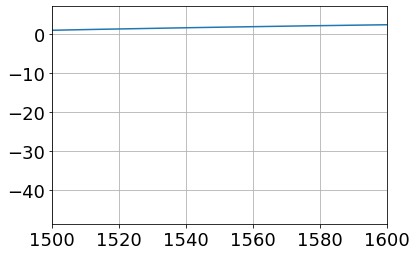

In [12]:
Length  = 1   # length in m

D = 2
Dslope = 0.019
beta2, beta3 = get_betas(D*ps/nm/km, Dslope*ps/nm/nm/km, 1.55*um)

beta2 = beta2/(ps**2/km) # (ps^2/km)
beta3 = beta3/(ps**3/km) # (ps^3/km)
beta4 = 0

Alpha   = 0.9e-5     # attentuation coefficient (dB/cm)
Gamma   = 10.5    # Gamma (1/(W km))

fibWL   = pulseWL # Center WL of fiber (nm)

Raman   = True    # Enable Raman effect?
Steep   = True    # Enable self steepening?

alpha = np.log((10**(Alpha * 0.1))) * 100  # convert from dB/cm to 1/m

# create the fiber
fiber3 = pynlo.media.fibers.fiber.FiberInstance()
fiber3.generate_fiber(Length, center_wl_nm=fibWL, betas=(beta2, beta3, beta4),
                              gamma_W_m=Gamma * 1e-3, gvd_units='ps^n/km', gain=-alpha)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(pulse.wl_nm, fiber3.Beta2_to_D(pulse))
ax.set_xlim([1500,1600])
# ax.set_ylim([-2,2])
ax.grid(True)

## Propagate

In [13]:
# Propagation
evol = pynlo.interactions.FourWaveMixing.SSFM.SSFM(local_error=0.005, USE_SIMPLE_RAMAN=True,
                 disable_Raman              = np.logical_not(Raman),
                 disable_self_steepening    = np.logical_not(Steep))

y, AW, AT, pulse_out1 = evol.propagate(pulse_in=pulse, fiber=fiber1, n_steps=Steps)
y, AW, AT, pulse_out2 = evol.propagate(pulse_in=pulse_out1, fiber=fiber2, n_steps=Steps)
y, AW, AT, pulse_out = evol.propagate(pulse_in=pulse_out2, fiber=fiber3, n_steps=Steps)

Pulse energy before Simple Fiber : 0.5000000000000001 nJ
pulse energy in  8368.92418173267
copied as   8368.92418173267
Step: 0 Distance remaining: 5.0


C:\Users\luish\AppData\Local\Continuum\anaconda3\lib\site-packages\pynlo-0.1.2-py3.7.egg\pynlo\interactions\FourWaveMixing\SSFM.py:274: RuntimeWarning: overflow encountered in exp
  np.exp(-T/tau2)*np.sin(T/tau1)
C:\Users\luish\AppData\Local\Continuum\anaconda3\lib\site-packages\pynlo-0.1.2-py3.7.egg\pynlo\interactions\FourWaveMixing\SSFM.py:274: RuntimeWarning: overflow encountered in multiply
  np.exp(-T/tau2)*np.sin(T/tau1)


Pulse energy after: 0.4975896397362282 nJ
Step: 1 Distance remaining: 4.95
Pulse energy after: 0.4975849625710486 nJ
Step: 2 Distance remaining: 4.9
Pulse energy after: 0.49758110480691103 nJ
Step: 3 Distance remaining: 4.85
Pulse energy after: 0.4975780546059816 nJ
Step: 4 Distance remaining: 4.8
Pulse energy after: 0.49757579678503655 nJ
Step: 5 Distance remaining: 4.75
Pulse energy after: 0.49757431352416687 nJ
Step: 6 Distance remaining: 4.699999999999999
Pulse energy after: 0.49757358554258035 nJ
Step: 7 Distance remaining: 4.6499999999999995
Pulse energy after: 0.49757359892120073 nJ
Step: 8 Distance remaining: 4.6000000000000005
Pulse energy after: 0.4975743634776819 nJ
Step: 9 Distance remaining: 4.55
Pulse energy after: 0.49757584785974635 nJ
Step: 10 Distance remaining: 4.5
Pulse energy after: 0.4975779693864967 nJ
Step: 11 Distance remaining: 4.45
Pulse energy after: 0.49758069621313566 nJ
Step: 12 Distance remaining: 4.4
Pulse energy after: 0.4975839957887454 nJ
Step: 13 Di

### That's it! Physics complete. Just plotting commands from here!

(-100.0, 0.0)

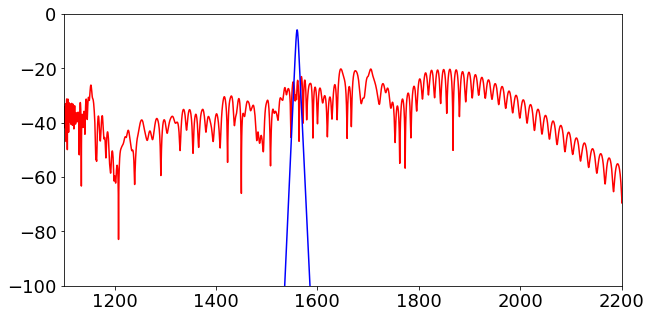

In [14]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(pulse.wl_nm,    dB(pulse_out.AW),  color = 'r')
ax.plot(pulse.wl_nm,    dB(pulse.AW),  color = 'b')
ax.set_xlim([1100,2200])
ax.set_ylim([-100,0])

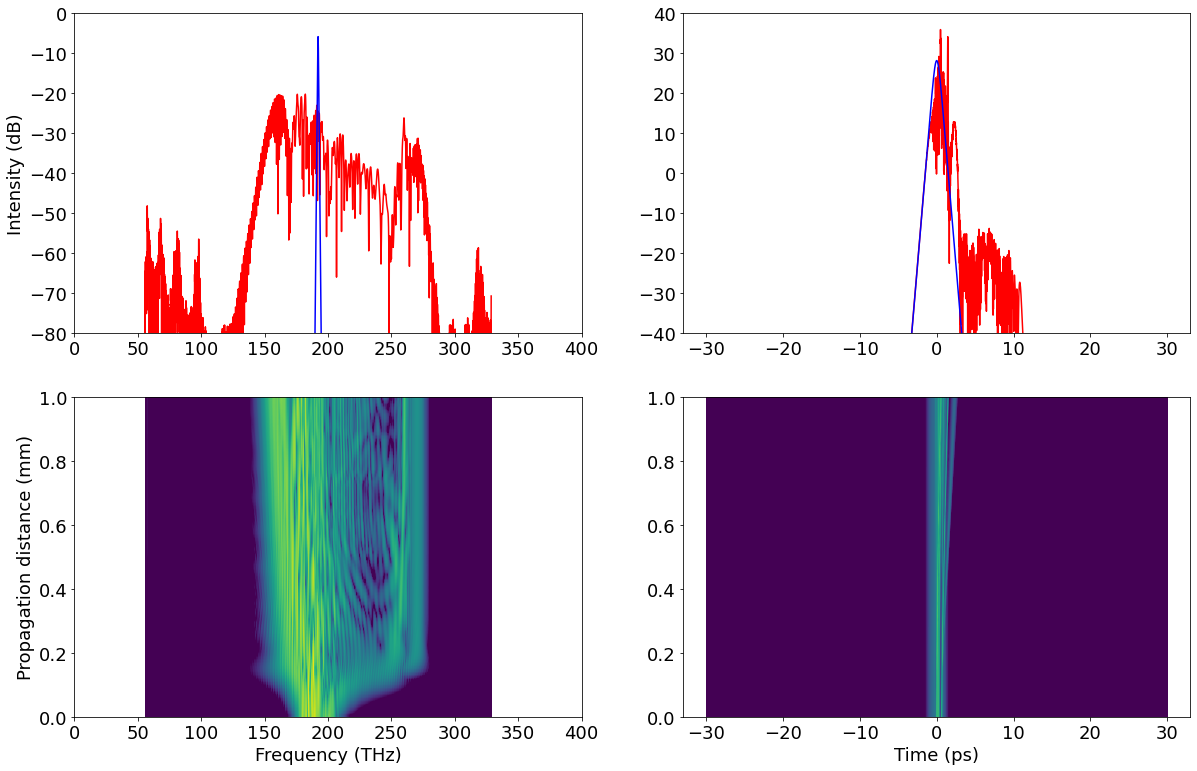

In [15]:
# set up plots for the results:a
fig = plt.figure(figsize=(20,20))
ax0 = plt.subplot2grid((3,2), (0, 0), rowspan=1)
ax1 = plt.subplot2grid((3,2), (0, 1), rowspan=1)
ax2 = plt.subplot2grid((3,2), (1, 0), rowspan=1, sharex=ax0)
ax3 = plt.subplot2grid((3,2), (1, 1), rowspan=1, sharex=ax1)

F = pulse.F_THz     # Frequency grid of pulse (THz)



zW = dB( np.transpose(AW)[:, (F > 0)] )
zT = dB( np.transpose(AT) )

y_mm = y * 1e3 # convert distance to mm

ax0.plot(pulse_out.F_THz,    dB(pulse_out.AW),  color = 'r')
ax1.plot(pulse_out.T_ps,     dB(pulse_out.AT),  color = 'r')

ax0.plot(pulse.F_THz,    dB(pulse.AW),  color = 'b')
ax1.plot(pulse.T_ps,     dB(pulse.AT),  color = 'b')

extent = (np.min(F[F > 0]), np.max(F[F > 0]), 0, Length)
ax2.imshow(zW, extent=extent,
           vmin=np.max(zW) - 40.0, vmax=np.max(zW),
           aspect='auto', origin='lower')

extent = (np.min(pulse.T_ps), np.max(pulse.T_ps), np.min(y_mm), Length)
ax3.imshow(zT, extent=extent,
           vmin=np.max(zT) - 40.0, vmax=np.max(zT),
           aspect='auto', origin='lower')


ax0.set_ylabel('Intensity (dB)')
ax0.set_ylim( - 80,  0)
ax1.set_ylim( - 40, 40)

ax2.set_ylabel('Propagation distance (mm)')
ax2.set_xlabel('Frequency (THz)')
ax2.set_xlim(0,400)

ax3.set_xlabel('Time (ps)')

plt.show()

In [16]:
c/(1.2*um)/THz

249.82704833333335